# Analyzing and Evaluating an Online Retail Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# implementing the dataset
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### You can see that some columns have no correlation to others and are just some descriptive information. 

In [4]:
columns = ['InvoiceNo','Description','CustomerID']
data.drop(columns=columns, axis=1, inplace=True)
data.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom


In [5]:
data['Quantity'].value_counts()

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

In [6]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [7]:
# droping the datetime column
newdata = data.drop(columns='InvoiceDate', axis=1)
newdata.head()

,StockCode,Quantity,UnitPrice,Country
0,85123A,6,2.55,United Kingdom
1,71053,6,3.39,United Kingdom
2,84406B,8,2.75,United Kingdom
3,84029G,6,3.39,United Kingdom
4,84029E,6,3.39,United Kingdom


#### Processing the columns into readable data for computer using LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
newdata['StockCode'] = newdata['StockCode'].astype(str)
newdata['StockCode'] = encoder.fit_transform(newdata['StockCode'])
newdata['Country'] = encoder.fit_transform(newdata['Country'])
newdata.head()

,StockCode,Quantity,UnitPrice,Country
0,3536,6,2.55,36
1,2794,6,3.39,36
2,3044,8,2.75,36
3,2985,6,3.39,36
4,2984,6,3.39,36


#### I only used 5000 samples, while the original dataset has around 500,000 samples, so if you want to, you can change that for yourself!

In [10]:
# Scaling the dataset
scaler = StandardScaler()
newdata = newdata.sample(n=5000)
X = newdata.values
X = scaler.fit_transform(X)
X

array([[-0.27184114, -0.14616372,  0.01611066,  0.27220927],
       [ 1.25047564,  0.0099474 , -0.07680352,  0.27220927],
       [-0.82599895, -0.1149415 , -0.08093304,  0.27220927],
       ...,
       [-1.11385914, -0.20860817, -0.04583213,  0.27220927],
       [-0.4432635 , -0.20860817, -0.04583213,  0.27220927],
       [ 0.07423796, -0.17738595, -0.01073122,  0.27220927]])

### Clustering the dataset using KMeans

C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

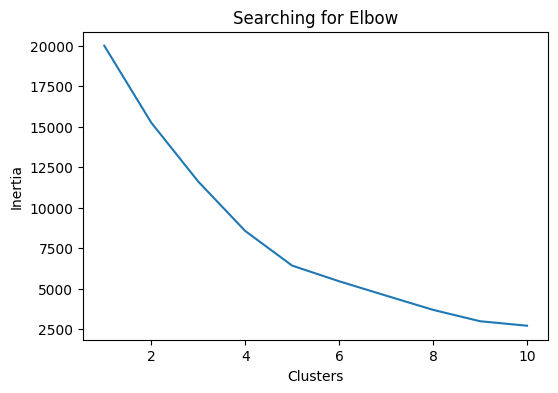

In [11]:
from sklearn.cluster import KMeans
import seaborn as sns

clusters = []

# testing from 1 to 10 cluster in order to know how many clusters are necessary for a better accuracy
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

#### 5 clusters looks a good number of clusters, so we try that using KMeans with 5 clusters.

C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


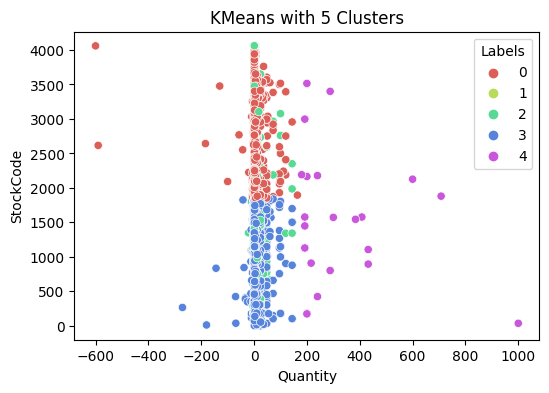

In [18]:
km5 = KMeans(n_clusters=5).fit(X)

newdata['Labels'] = km5.labels_

# ploting labels with Stockcode as y and Quantity as x
plt.figure(figsize=(6, 4))
sns.scatterplot(x=newdata['Quantity'], y=newdata['StockCode'], hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use s

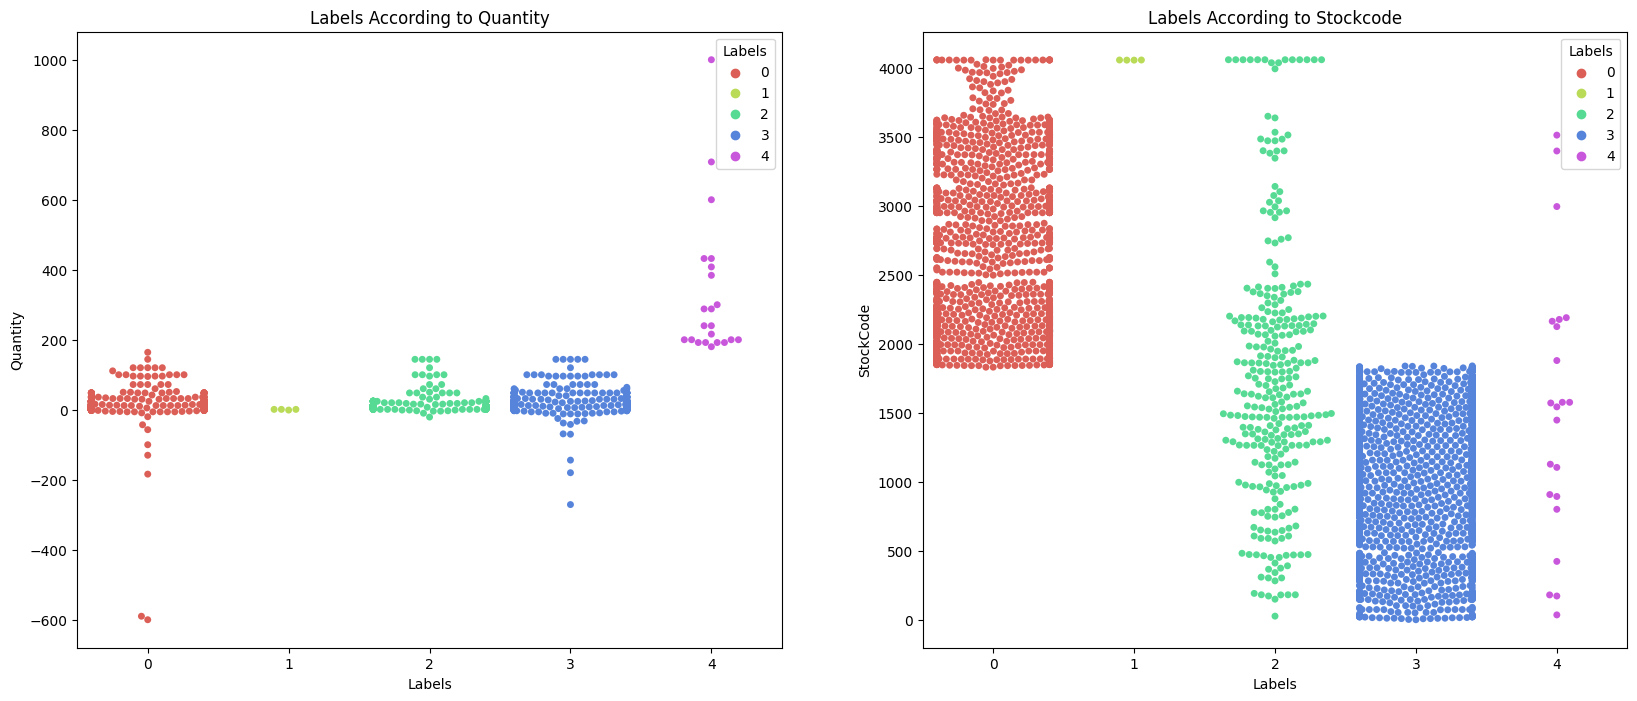

In [19]:
# Analyzing the dataset with labels as x and Quantity as y
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Quantity', data=newdata, ax=ax, hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Quantity')

# Analyzing the dataset with labels as x and StockCode as y
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='StockCode', data=newdata, ax=ax, hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Stockcode')

plt.show()

C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.3% of the points cannot be placed; you may want to decrease the size of the markers or use s

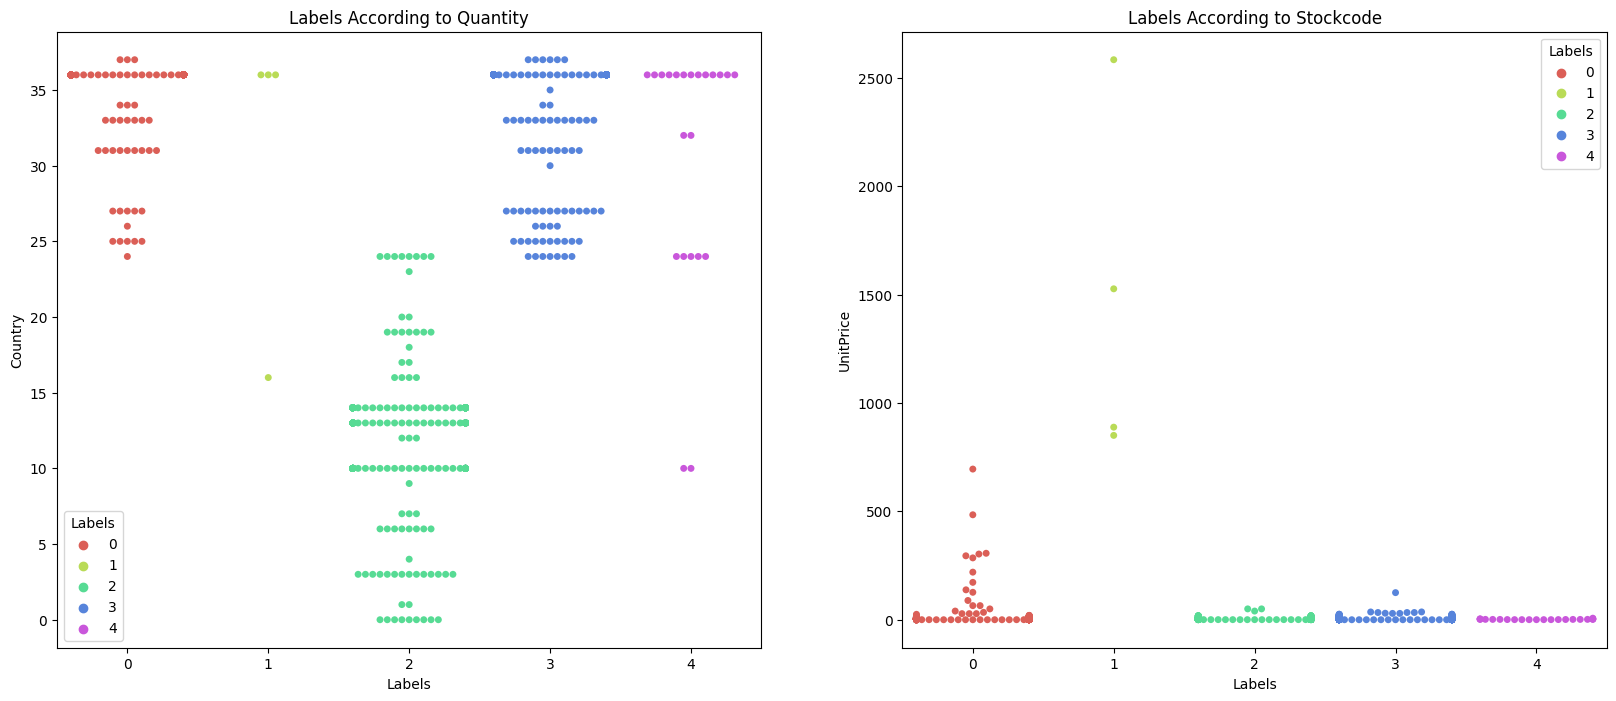

In [20]:
# Analyzing the dataset with labels as x and Country as y
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Country', data=newdata, ax=ax, hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Quantity')

# Analyzing the dataset with labels as x and UnitPrice as y
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='UnitPrice', data=newdata, ax=ax, hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Stockcode')

plt.show()